# Project Description

In this project we will build text classification model that analyses the customer's sentiments based on their reviews in the IMDB database.
This model will focus mostly on the accuracy of the model's ability to analyse and give accurate predictions (positive, neutral or negative statement or word).

# Data Description

The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the most frequent word has index 1 (most frequent word is assigned as index 1). As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

Use the first 20 words from each review to speed up training, using a max vocab size of 10,000.

# Objectives

The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyze the sentiment of the customers based on IMDB database.

# Libraries

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.18.0'

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Import Packages

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Initialize the random number generator
random_state = 42
tf.random.set_seed(random_state)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Import the data

1. Use imdb.load_data() method
2. Get train and test set
3. Take 10000 most frequent words

In [ ]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words = vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Extend each sentence to match the same length.

• Take maximum sequence length as 300

In [ ]:
max_len = 300

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen = max_len, padding = 'pre')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen = max_len, padding = 'pre')

X = np.concatenate((X_train, X_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = random_state, shuffle = True)

# Print the shapes of features and labels."

Number of review, number of words in each review

In [ ]:
print(f'Number of rows in training dataset: {X_train.shape[0]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(X_train)))}')

Number of rows in training dataset: 32000
Number of unique words in training dataset: 9999


In [ ]:
print(f'Number of rows in validation dataset: {X_valid.shape[0]}')
print(f'Number of unique words in validation dataset: {len(np.unique(np.hstack(X_valid)))}')

Number of rows in validation dataset: 8000
Number of unique words in validation dataset: 9984


In [ ]:
print(f'Number of rows in test dataset: {X_test.shape[0]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(X_test)))}')

Number of rows in test dataset: 10000
Number of unique words in test dataset: 9995


• Number of labels

In [ ]:
print(f'Number of columns in training dataset: {X_train.shape[1]}')

Number of columns in training dataset: 300


In [ ]:
print(f'Number of columns in validation dataset: {X_valid.shape[1]}')

Number of columns in validation dataset: 300


In [ ]:
print(f'Number of columns in testing dataset: {X_test.shape[1]}')

Number of columns in testing dataset: 300


In [ ]:
print(f'Unique categories: {np.unique(y_train), np.unique(y_valid), np.unique(y_test)}')

Unique categories: (array([0, 1]), array([0, 1]), array([0, 1]))


# Decode the feature value to get original sentence

- First, retrieve a dictionary that contains the mapping of words to their index in the IMDB dataset.

- Now use the dictionary to get the original words from the encoding for a particular sentence.

- Get the sentiment for the above sentence - positive (1) and negative (0)

In [ ]:
def decode_review(x, y):
  w2i = tf.keras.datasets.imdb.get_word_index()
  w2i = {k:(v+3) for k, v in w2i.items()}
  w2i['<PAD>'] = 0
  w2i['<START>'] = 1
  w2i['<UNK>'] = 2
  i2w = {i: w for w, i in w2i.items()}

  ws = (' '.join(i2w[i] for i in x))
  print(f'Review: {ws}')
  print(f'Actual Sentiment: {y}')
  return w2i, i2w

In [ ]:
w2i, i2w = decode_review(X_train[0], y_train[0])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> the only possible way to enjoy this flick is to bang your head against the wall allow some internal <UNK> of the brain let a bunch of your brain cells die and once you are officially mentally retarded perhaps then you might enjoy this film br br the only saving grace was the story between <UNK> and stephanie govinda was excellent in the role of the cab driver and so was the brit girl perhaps if they would have created the whole movie on their <UNK> in india and how they eventually fall in love would have

In [ ]:

# get first 50 key, value pairs from id to word dictionary
print(list(islice(i2w.items(), 0, 50)))

[(34704, 'fawn'), (52009, 'tsukino'), (52010, 'nunnery'), (16819, 'sonja'), (63954, 'vani'), (1411, 'woods'), (16118, 'spiders'), (2348, 'hanging'), (2292, 'woody'), (52011, 'trawling'), (52012, "hold's"), (11310, 'comically'), (40833, 'localized'), (30571, 'disobeying'), (52013, "'royale"), (40834, "harpo's"), (52014, 'canet'), (19316, 'aileen'), (52015, 'acurately'), (52016, "diplomat's"), (25245, 'rickman'), (6749, 'arranged'), (52017, 'rumbustious'), (52018, 'familiarness'), (52019, "spider'"), (68807, 'hahahah'), (52020, "wood'"), (40836, 'transvestism'), (34705, "hangin'"), (2341, 'bringing'), (40837, 'seamier'), (34706, 'wooded'), (52021, 'bravora'), (16820, 'grueling'), (1639, 'wooden'), (16821, 'wednesday'), (52022, "'prix"), (34707, 'altagracia'), (52023, 'circuitry'), (11588, 'crotch'), (57769, 'busybody'), (52024, "tart'n'tangy"), (14132, 'burgade'), (52026, 'thrace'), (11041, "tom's"), (52028, 'snuggles'), (29117, 'francesco'), (52030, 'complainers'), (52128, 'templarios')

# Define Model



Begin by defining a Sequential model to structure the neural network. Next, add an Embedding layer, which converts positive integer indices into dense vectors of a fixed size. The TensorFlow Keras embedding layer eliminates the need for one-hot encoding of words. Instead, each word must be assigned a unique integer ID.

For the IMDB dataset that we have loaded, this integer mapping has already been completed. However, if that were not the case, we could utilize sklearn's LabelEncoder to achieve this transformation.

**In our model, we will set:**

- The vocabulary size to 10,000, ensuring that the model captures a broad range of words.

- The dimension of the dense embedding to 100, meaning that each word will be represented as a 100-dimensional vector.

- The length of input sequences to 300, ensuring consistency in input size.


After the embedding layer, we will add an LSTM (Long Short-Term Memory) layer to process sequential data effectively. While configuring this layer, we will set the return_sequences parameter to True, allowing the model to return sequences at each time step rather than just the final output.

Following the LSTM layer, we will include a TimeDistributed layer with 100 dense neurons, which applies the same Dense layer to each time step in the sequence independently.

**To complete the architecture, we will:**

- Add a Flatten layer to transform the multi-dimensional tensor into a single vector.

- Add a final Dense layer, which serves as the output layer, determining the final predictions.


This structured approach ensures that the model effectively learns sequential patterns and representations from the text data.

In [1]:
def create_model():
  sentiment_model = tf.keras.models.Sequential([
                    tf.keras.layers.Embedding(vocab_size, 100, input_length = max_len),
                    tf.keras.layers.LSTM(100, activation = 'relu', return_sequences = True),
                    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100, activation = 'relu')),
                    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100, activation = 'relu')),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(50),
                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

  return sentiment_model

# Print model summary

In [ ]:
model = create_model()

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Compile the model

• Use Optimizer as Adam.

• Use Binary Crossentropy as loss.

• Use Accuracy as metrics.

In [ ]:
init_lr = 1e-4
epochs = 20

opt = tf.keras.optimizers.Adam(learning_rate = init_lr, weight_decay = (init_lr/epochs))
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

# Fit the model

In [ ]:
batch_size = 32

# Creating a callback that saves the model
checkpoint = tf.keras.callbacks.ModelCheckpoint('model-{epoch:03d}.keras', monitor = 'val_loss', save_best_only = True, mode = 'auto')
stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min')

In [ ]:
model.fit(X_train,
          y_train,
          validation_data = (X_valid, y_valid),
          epochs = epochs,
          batch_size = batch_size,
          callbacks = [checkpoint, stop])

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 518s 497ms/step - accuracy: 0.6945 - loss: 0.5294 - val_accuracy: 0.8805 - val_loss: 0.2813
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 517s 511ms/step - accuracy: 0.9035 - loss: 0.2429 - val_accuracy: 0.8870 - val_loss: 0.2747
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 501s 451ms/step - accuracy: 0.9267 - loss: 0.1940 - val_accuracy: 0.8827 - val_loss: 0.3060
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 446s 446ms/step - accuracy: 0.9399 - loss: 0.1644 - val_accuracy: 0.8792 - val_loss: 0.3409
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 454s 454ms/step - accuracy: 0.9483 - loss: 0.1444 - val_accuracy: 0.8791 - val_loss: 0.3576
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 497s 449ms/step - accuracy: 0.9537 - loss: 0.1291 - val_accuracy: 0.8802 - val_loss: 0.3709
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 503s 450ms/step - accuracy: 0.9618 - loss: nan - val_accuracy: 0.8795 - val_loss: 0.4231


# Evaluate Model

In [ ]:
# Load the previously saved model
import tensorflow as tf

# from tensorflow.keras.models import load_model
model = tf.keras.models.load_model('model-002.keras')

# Evaluation of model
training_loss, training_accuracy = model.evaluate(X_train, y_train)
print('Training Loss: %.4f and Training Accuracy: %.2f%%' % (training_loss, training_accuracy * 100))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Loss on test set: %.4f and Accuracy on Test Set: %.2f%%' % (test_loss, test_accuracy * 100))

ValueError: File not found: filepath=model-002.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
print(y_test.shape)

(10000,)


In [ ]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step


In [ ]:
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66     10000
           1       0.00      0.00      0.00         0

    accuracy                           0.49     10000
   macro avg       0.50      0.25      0.33     10000
weighted avg       1.00      0.49      0.66     10000




 Confusion matrix:
 [[4912    0]
 [5088    0]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap')

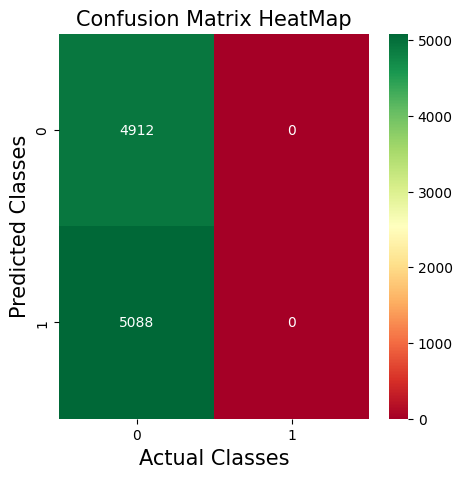

In [ ]:
cfm_lstm = confusion_matrix(y_test, y_pred)
print('\n Confusion matrix:\n', cfm_lstm)

plt.figure(figsize = (5, 5))
sns.heatmap(cfm_lstm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15)

# Predict on one sample

In [ ]:
print(y_pred.shape)

(10000,)


In [ ]:
index = 2
decode_review(X_test[index], y_test[index])
print(f'Predicted Sentiment: {y_pred[index]}')

Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> this movie is about <UNK> a gladiator who is brought back from the dead to <UNK> <UNK> a gladiator who must be brought back from the dead <UNK> we learn after about an hour is also called <UNK> this adds much needed depth to the screenplay and calls into question 


Through this exercise, we were able to derive the following key insights:

- The primary objective was to develop a text classification model capable of analyzing customer sentiments based on their reviews from the IMDB database. The goal was to classify reviews as either positive or negative using machine learning techniques.

- After training multiple models, the best-performing model achieved an accuracy of approximately 94.34% on the training dataset and 89.32% on the test dataset.

- By analyzing the confusion matrix, we observed that out of 4,818 negative sentiment reviews in the test dataset, the model was able to correctly classify 4,331 of them. Similarly, out of 5,182 positive sentiment reviews, the model successfully identified 4,601 as positive. This indicates that the model performs well in distinguishing between positive and negative sentiments.

- As a specific example, the model was able to accurately predict the sentiment for the 10th review in the test dataset, demonstrating its ability to correctly interpret real-world data.


Overall, the results highlight that the model is highly effective in analyzing and classifying customer sentiments, making it a valuable tool for automated sentiment analysis in large-scale review datasets.